In [21]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

In [312]:
def to_int(bits):
    """
    Converts a size 3 bit binary index to an integer between 0 and 7.
    
    input: 
    
    bits - numpy array of size 3 representing the integer
    Type: numpy integer array
    ex. [0,1,1]
    
    output: 
    
    rep - an integer representation of the given 3 bit index
    Type: int
    ex. 3
    """
    rep = int(str(int(bits[0]))+str(int(bits[1]))+str(int(bits[2])), 2)
    return rep

In [313]:
def rule(num, state):
    """
    Takes in a given rule and 3-bit index state to determine the state of an index at a given
    time step.
    
    Essentially this checks if the given binary digit (representing the state)
    in the rule number is a 1 or 0. If true, returns a 1, if false returns a 0.
    
    Inputs:
    num - the rule number for the fundamental cellular automaton as an integer
    (ranges from 0-255)
    Type: int
    ex. 254 - b11111110
    
    state - the integer representation of one of the 8 possible 3-bit index states
    (ranges from 0-7)
    Type: int
    ex. 4
    
    Output:
    bit_val - an integer representing the resulting output of the rule (either 0 or 1)
    Type: int
    ex. 1
    """
    
    bit_val = int((num & (1 << state)) > 0)
    return bit_val

In [319]:
def update_edges(arr, rule_num, wrap=True):
    """
    Inputs:
    arr - the array you would like to update the edges of
    
    rule_num - the fundamental CA rule number as an integer
    
    Outputs:
    none, array will update in place
    """
    arr[1, 0] = rule(rule_num, to_int((arr[0,-1], arr[0,0], arr[0,1])))
    arr[1, -1] = rule(rule_num, to_int((arr[0,0], arr[0,1], arr[0,-1])))

In [328]:
def simulate(time_steps, rule_num, init_cond, size=None):
    """
    Simulates the given fundamental cellular automaton rule for a given number of
    time steps
    
    Inputs:
    size - the size of 1d array to apply the CA rule to as an integer
    
    If this is not included or is smaller than the initial condition, 
    the size is implied from the initial condition array. 
    If larger than the initial condition, the initial condition starts at index 0
    and the rest of the array is filled in with 0's.
    
    ex. 5
    Type: int
    
    
    time_steps - the number of time steps to simulate for
    ex. 7
    Type: int
    
    rule_num - the fundamental CA rule number to apply (ranges from 0-255)
    ex. 28
    Type: int
    
    init_cond - the initial condition of the 1d array as a 1d integer numpy array
    ex. [0, 0, 1, 0, 0]
    Type: numpy array
    
    """
    grid = np.array(init_cond)
    if size != None or size > init_cond.size:
        padding = np.array([0] * (size - init_cond.size))
        grid = np.concatenate((grid, padding))
    else:
        size = init_cond.size
    grid = np.expand_dims(grid, 0)
    for t in range(time_steps):
        grid = np.concatenate((grid, np.zeros((1, size), dtype=int)), axis=0)
        for i in range(1, size-1):
            #Both ends will be updated later with separate function
            bin_state = grid[t, i-1:i+2]
            state = to_int(bin_state)
            grid[t+1, i] = rule(rule_num, state)
        update_edges(grid[t:t+2, :], rule_num)
    return grid

In [342]:
impulse = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [343]:
example = simulate(11, 101, impulse, 11)

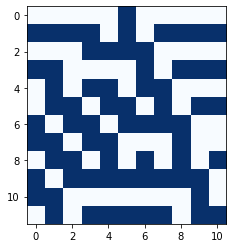

In [344]:
fig, ax = plt.subplots()

ax.imshow(example, cmap='Blues')

plt.show()